In [1]:
#Digit Recognition using Python and Machine Learning
#Dataset downloaded from kaggle website, https://www.kaggle.com/c/digit-recognizer/data
#Received an accuracy score of 0.97885 for my submission for the kaggle competition


In [2]:
#Import Libraries 

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils



Using TensorFlow backend.


In [3]:
#Load training and test data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [4]:
print (train_data.head())
print (train_data.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [66]:
# Seperate x and y columns

train = train_data.iloc[:,1:].values # all pixel values
labels = train_data.iloc[:,0].values # only labels i.e targets digits
test = test_data.values


In [67]:
#Loading images into numpy array and reshaping it

train =train.reshape(train.shape[0], 28, 28)

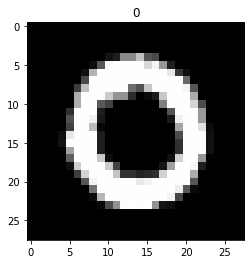

In [68]:
#Visualizing a single image using matplotlib

plt.imshow(train[1], cmap=plt.get_cmap('gray'))
plt.title(labels[1]);

In [92]:
#Adding a dimension to the data
x_train = train.reshape(train.shape[0], 28, 28,1)
x_test = test.reshape(test.shape[0], 28, 28,1)



In [93]:
#Split training and testing case
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(train, labels,
                                                    #test_size=0.2,
                                                    #stratify=labels)

In [94]:
# Data augmentation
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=10,
                                    zoom_range=0.15, 
                                    width_shift_range=0.1,
                                    height_shift_range=0.1)
test_generator = ImageDataGenerator(rescale = 1./255)
train_generator.fit(x_train)
test_generator.fit(x_test)

In [95]:
#Convert data type 

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(x_test.shape)

(28000, 28, 28, 1)


In [103]:
#Pre-processing the labels column

print(labels.shape)
print(labels[:10])

(42000,)
[1 0 1 4 0 0 7 3 5 3]


In [104]:
#Convert 1-dimensional class arrays to 10-dimensional class matrices for labels
Y_train = np_utils.to_categorical(labels, 10)


(42000, 10)


In [105]:
#Applying CNN deep learning model to the data

#Initializing the CNN
model = Sequential()

In [106]:
#Convolution
#Adding 1st layer
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

#Adding 2nd layer
model.add(Convolution2D(32, (3, 3), activation='relu'))

#Pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [107]:
#Flattening
model.add(Flatten())

#Full Connection
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [108]:
#Compiling the CNN
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [109]:
#Fitting the CNN to the images

model.fit(x_train, Y_train, 
          batch_size=32, epochs=2, verbose=1)

Epoch 1/2
42000/42000 [==============================] - 201s 5ms/step - loss: 0.6282 - accuracy: 0.8693
Epoch 2/2
42000/42000 [==============================] - 217s 5ms/step - loss: 0.1691 - accuracy: 0.9506


In [110]:
#score = model.evaluate(x_test, Y_test, verbose=0)
#print(score)

In [111]:
#Using CNN model to make predictions for the test set

results = model.predict_classes(x_test, verbose=0)
print(results)
len(results)

[2 0 9 ... 3 9 2]


28000

In [112]:
#Storing the predictions in the csv file

df = pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
df.to_csv('submission.csv', index = False, header=True)